# Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Load the preprocessed data

In [2]:
df = pd.read_csv('C:/Users/SIDDHI/Desktop/Multiple-Disease-Prediction/data/cancer/preprocessed_data.csv')


# Creating features and label

In [3]:
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

# Splitting data into training and test set

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# Scaling data

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Logistic Regression Model Training

In [6]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

# Model predictions

In [7]:
y_pred = log_reg.predict(X_test)

# Accuracy score

In [12]:
print(accuracy_score(y_test, y_pred))

0.9590643274853801


# Confusion Matrix Heatmap

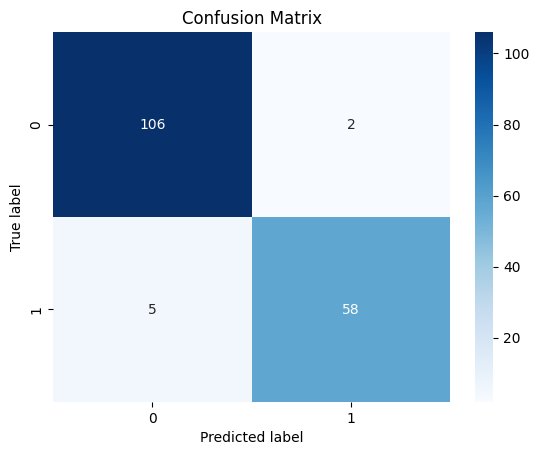

In [9]:

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


# Precision-Recall Curve

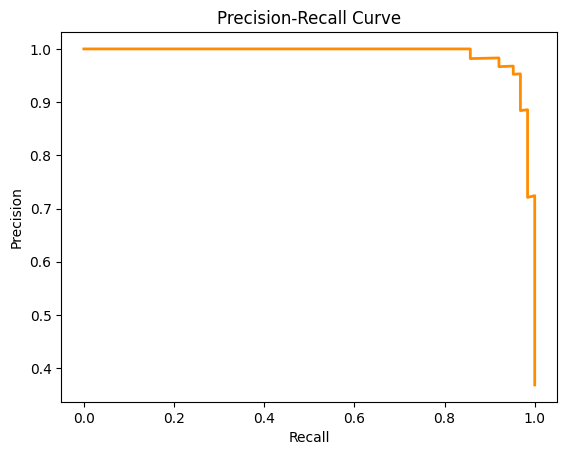

In [10]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, log_reg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


# ROC Curve

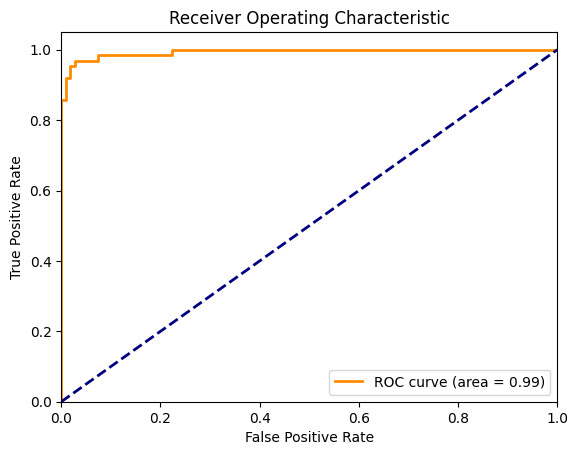

In [11]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Classification report

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       108
           1       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



# Save the Logistic Regression Model

In [14]:
import pickle

# Save the model to a file
with open('C:/Users/SIDDHI/Desktop/Multiple-Disease-Prediction/app/models/cancer/logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(log_reg, file)


In [15]:
# Load the model from a file
with open('C:/Users/SIDDHI/Desktop/Multiple-Disease-Prediction/app/models/cancer/logistic_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
